<a href="https://colab.research.google.com/github/astrodatos/Clase4/blob/master/Actividad_4_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CD2201: Ciencia de Datos en Astronomía**
**Profesores:** Pía Cortés, Daniela Barrientos, Matías Mattamala, Matías Suazo

##**Actividad Clase 4 - Extragaláctico**

###**Objetivos:**
1.   Lectura de archivos desde **Google Drive** personal
2.   Utilización de **astropy** en el apertura de archivos *FITS*
3.   Manejo de los paquetes **numpy** y **pandas** para el uso de arreglos y grandes bases de datos.
4.   Repasar **matplotlib** para la creación de gráficos.



#**Diagrama color-magnitud para estrellas**
En las clases anteriores vimos que las estrellas se distribuyen de una forma muy particular en un diagrama Luminosidad vs Temperatura. Dicho diagrama se llama diagrama Hertprung-Russell. 

<img src="https://upload.wikimedia.org/wikipedia/commons/6/6b/HRDiagram.png" alt="Simply Easy Learning" width="1000"
         height="800">
 
También vimos que muchas veces se carece de estos parámetros, sin embargo, la utilización de un diagrama Color-Magnitud suele ser equivalente.


#**Diagrama color-magnitud para galaxias**

El objetivo de esta actividad es identificar si hay existe algún tipo de distribución especial para las galaxias, tal como lo es para las estrellas.

Con este propósito, trabajaremos en el creación de un diagrama color-magnitud para galaxias. **NOTA:** El concepto de temperatura de una galaxia no existe, así que no es posible hacer un diagrama Luminosidad-Temperatura.

Para este propósito trabajaremos con datos del Sloan Digital Sky Survey (SDSS), data release 16 (DR16). Recuerden que el SDSS es un proyecto de investigación que ha mapeado el cielo en búsqueda de objetos distantes. Las observaciones se encuentran en el espectro visible e infrarrojo, comenzó el año 2000, y ha tenido varias mejoras a través del tiempo.

<img src="https://www.sdss.org/wp-content/uploads/2014/06/orangepie.jpg" width="600"
         height="600">



###**Paso 1: Montar el disco**

Los datos que utilizaremos han sido provistos a través de material docente. Es de su responsabilidad subirlo a su Google Drive personal.

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


###**Paso 2: Cargar paquetes necesarios**

In [91]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
from astropy.table import Table

###**Paso 3: Lectura de los archivos**
Los archivos fits **NO SÓLO** se utilizan en el almacenamiento de imágenes, si no que también para almacenar información tabulada. La ventaja radica en la ligereza del archivo.

In [93]:
enlace1 = '/content/drive/My Drive/table1.fits'
enlace2 = '/content/drive/My Drive/table1.fits'

dat1 = Table.read(enlace1,format='fits')
dat2 = Table.read(enlace2,format='fits')

df1 = dat1.to_pandas()
df2 = dat2.to_pandas()

Revisemos que información proveen estos archivos fits.

In [94]:
df1

,objid,ra,dec,u,g,r,i,z,redshift
0,1237674475439391293,174.434089,60.749397,25.493866,22.555429,20.862173,19.874660,19.400928,0.509239
1,1237674475439653429,175.581724,60.899055,25.653475,22.334442,20.638035,19.722954,19.290579,0.475017
2,1237661970118476705,200.266640,6.160458,22.681828,22.567169,21.054277,19.969360,19.382036,0.574864
3,1237655106763948418,170.231015,58.003386,22.441759,22.199524,20.495407,19.407616,18.899120,0.583706
4,1237664285098181114,133.065839,8.469283,23.591387,20.601393,18.917233,18.298597,17.837732,0.338474
...,...,...,...,...,...,...,...,...,...
185880,1237650369939833052,168.057572,-2.849937,25.673498,22.359625,20.468431,19.429737,18.890257,0.565857
185881,1237650369944683638,179.134926,-3.008667,24.953999,21.534536,19.719875,18.913021,18.556267,0.440233
185882,1237669767085293935,11.501684,7.564743,25.961109,21.712229,19.955654,19.057663,18.639196,0.479855
185883,1237650369936556831,160.599336,-2.746469,25.802046,22.489908,20.335443,19.434641,18.977377,0.515428


In [95]:
df2

,objid,ra,dec,u,g,r,i,z,redshift
0,1237674475439391293,174.434089,60.749397,25.493866,22.555429,20.862173,19.874660,19.400928,0.509239
1,1237674475439653429,175.581724,60.899055,25.653475,22.334442,20.638035,19.722954,19.290579,0.475017
2,1237661970118476705,200.266640,6.160458,22.681828,22.567169,21.054277,19.969360,19.382036,0.574864
3,1237655106763948418,170.231015,58.003386,22.441759,22.199524,20.495407,19.407616,18.899120,0.583706
4,1237664285098181114,133.065839,8.469283,23.591387,20.601393,18.917233,18.298597,17.837732,0.338474
...,...,...,...,...,...,...,...,...,...
185880,1237650369939833052,168.057572,-2.849937,25.673498,22.359625,20.468431,19.429737,18.890257,0.565857
185881,1237650369944683638,179.134926,-3.008667,24.953999,21.534536,19.719875,18.913021,18.556267,0.440233
185882,1237669767085293935,11.501684,7.564743,25.961109,21.712229,19.955654,19.057663,18.639196,0.479855
185883,1237650369936556831,160.599336,-2.746469,25.802046,22.489908,20.335443,19.434641,18.977377,0.515428


In [28]:
#Calculo de distancias
#H0 = 74 (km/s)/Mpc Megamaser Cosmology Project
#d = cz/H0
c = 300000 #km/s
H0 = 74 #(km/s)/Mpc
df_new['distance'] = c*df_new['redshift']/H0 #Mpc

In [58]:
#definir magnitudes absolutas
df_new['Mu'] = df_new['u'] - 5*np.log10(df_new['distance']*1e6/10.)
df_new['Mg'] = df_new['g'] - 5*np.log10(df_new['distance']*1e6/10.)
df_new['Mr'] = df_new['r'] - 5*np.log10(df_new['distance']*1e6/10.)
df_new['Mi'] = df_new['i'] - 5*np.log10(df_new['distance']*1e6/10.)
df_new['Mz'] = df_new['z'] - 5*np.log10(df_new['distance']*1e6/10.)
df_new['g-r'] = df_new['g'] - df_new['r']
df_new = df_new[df_new['class']==b'GALAXY']
df_new = df_new[df_new['Mr']>-23]
df_new = df_new[df_new['Mr']<-19]
df_new = df_new[df_new['g-r']> (1/12.)*df_new['Mr']**2 + (13/4.)*df_new['Mr'] + 95/3.]
df_new = df_new.reset_index(drop=True)

In [59]:
df_new

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid,distance,Mu,Mg,Mr,Mi,Mz,g-r
0,1237674475439391293,174.434089,60.749397,25.493866,22.555429,20.862173,19.874660,19.400928,6752,301,6,34,8001846342434295808,b'GALAXY',0.509239,7107,56740,275,2064.483643,-16.080191,-19.018628,-20.711884,-21.699397,-22.173129,1.693256
1,1237674475439653429,175.581724,60.899055,25.653475,22.334442,20.638035,19.722954,19.290579,6752,301,6,38,8001809508794765312,b'GALAXY',0.475017,7107,56740,141,1925.743042,-15.769517,-19.088550,-20.784957,-21.700038,-22.132413,1.696407
2,1237661970118476705,200.266640,6.160458,22.681828,22.567169,21.054277,19.969360,19.382036,3841,301,1,236,5449366364819951616,b'GALAXY',0.574864,4840,55690,39,2330.530518,-19.155446,-19.270105,-20.782997,-21.867914,-22.455238,1.512892
3,1237655106763948418,170.231015,58.003386,22.441759,22.199524,20.495407,19.407616,18.899120,2243,301,1,285,7994089286155505664,b'GALAXY',0.583706,7100,56636,727,2366.375000,-19.428659,-19.670894,-21.375011,-22.462802,-22.971298,1.704117
4,1237674475439784445,176.197717,60.967286,23.546627,21.828829,20.654665,19.828569,19.431967,6752,301,6,40,8001777073201745920,b'GALAXY',0.567457,7107,56740,23,2300.503174,-18.262487,-19.980285,-21.154449,-21.980545,-22.377147,1.174164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316160,1237650369945141401,180.144997,-2.970141,20.858206,19.204451,17.911873,17.394892,17.037815,1140,301,2,182,372725135695702016,b'GALAXY',0.187212,331,52368,190,758.969360,-18.542915,-20.196671,-21.489248,-22.006229,-22.363306,1.292578
316161,1237661384385691870,152.153537,38.647033,17.103395,15.630472,14.966977,14.608419,14.355526,3704,301,6,135,1605655638040406016,b'GALAXY',0.055792,1426,52993,445,226.184464,-19.668918,-21.141842,-21.805337,-22.163894,-22.416788,0.663495
316162,1237669767085293935,11.501684,7.564743,25.961109,21.712229,19.955654,19.057663,18.639196,5656,301,4,92,5115045014309572608,b'GALAXY',0.479855,4543,55888,297,1945.359131,-15.483890,-19.732770,-21.489345,-22.387336,-22.805803,1.756575
316163,1237650369936556831,160.599336,-2.746469,25.802046,22.489908,20.335443,19.434641,18.977377,1140,301,2,51,4245793380728967168,b'GALAXY',0.515428,3771,55544,90,2089.574463,-15.798243,-19.110381,-21.264846,-22.165648,-22.622912,2.154465


1.999999999999993


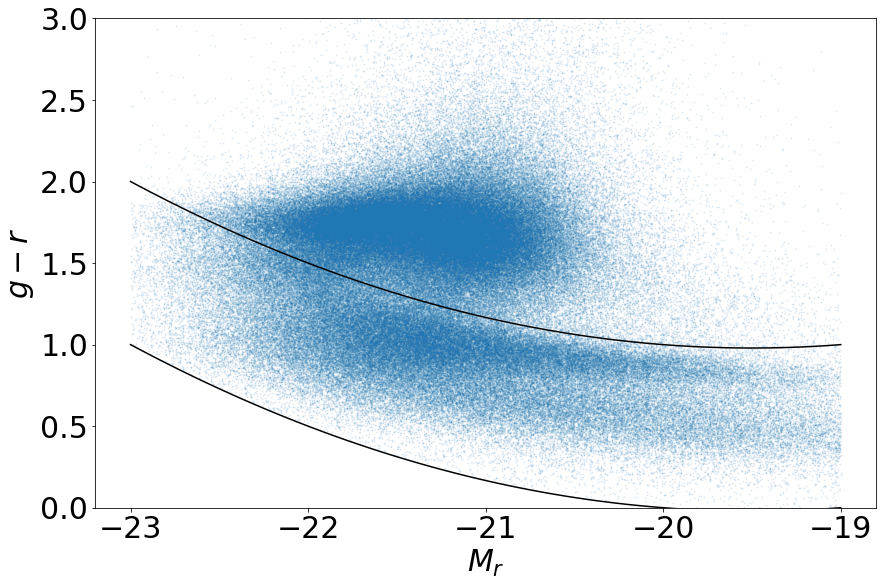

In [82]:
x = np.linspace(-23,-19,100)
y = (1/12.)*x**2 + (13/4.)*x + 95/3.
y2 = (1/12.)*x**2 + (13/4.)*x + 98/3.
print(y2[0])

matplotlib.rcParams.update({'font.size': 30}) 
plt.figure(figsize=(14,9))
plt.scatter(df_new['Mr'],df_new['g']-df_new['r'],alpha=0.1,s=1)
plt.plot(x,y,c='k')
plt.plot(x,y2,c='k')
plt.xlabel('$M_{r}$')
plt.ylabel('$g-r$')
plt.gca().set_ylim([0,3])
#plt.gca().invert_xaxis()
plt.show()
plt.close()

In [83]:
df_1 = df_new[df_new['g-r'] >= (1/12.)*df_new['Mr']**2 + (13/4.)*df_new['Mr'] + 98/3.]
df_2 = df_new[df_new['g-r'] < (1/12.)*df_new['Mr']**2 + (13/4.)*df_new['Mr'] + 98/3.]

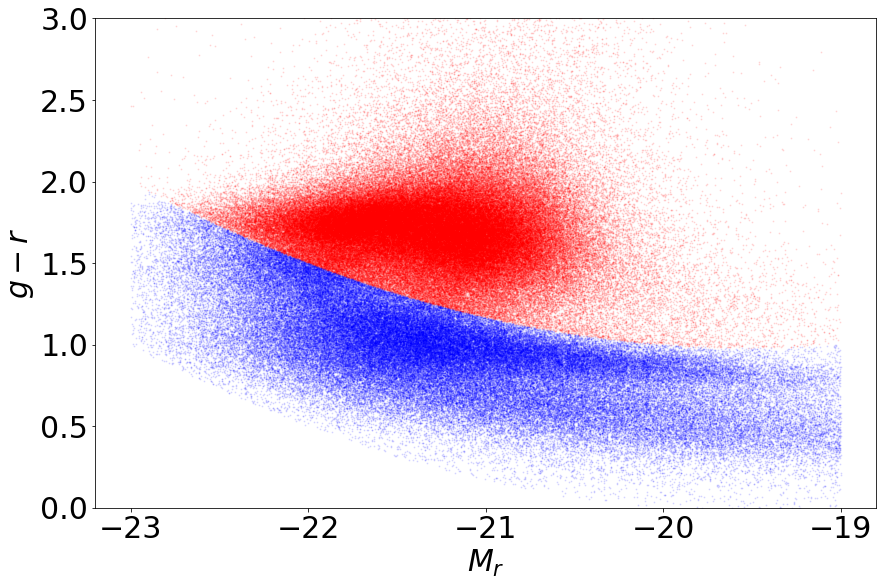

In [84]:
matplotlib.rcParams.update({'font.size': 30}) 
plt.figure(figsize=(14,9))
plt.scatter(df_1['Mr'],df_1['g']-df_1['r'],alpha=0.1,s=1,c='red')
plt.scatter(df_2['Mr'],df_2['g']-df_2['r'],alpha=0.1,s=1,c='blue')
#plt.plot(x,y,c='k')
#plt.plot(x,y2,c='k')
plt.xlabel('$M_{r}$')
plt.ylabel('$g-r$')
plt.gca().set_ylim([0,3])
#plt.gca().invert_xaxis()
plt.show()
plt.close()

In [88]:
df_save1 = df_1[['objid','ra','dec','u','g','r','i','z','redshift']]
df_save2 = df_2[['objid','ra','dec','u','g','r','i','z','redshift']]
new_1 = Table.from_pandas(df_save1)
new_2 = Table.from_pandas(df_save2)
new_1.write('table1.fits')
new_2.write('table2.fits')

In [92]:
files.download('table1.fits')
files.download('table2.fits')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 0, '$M_z$')

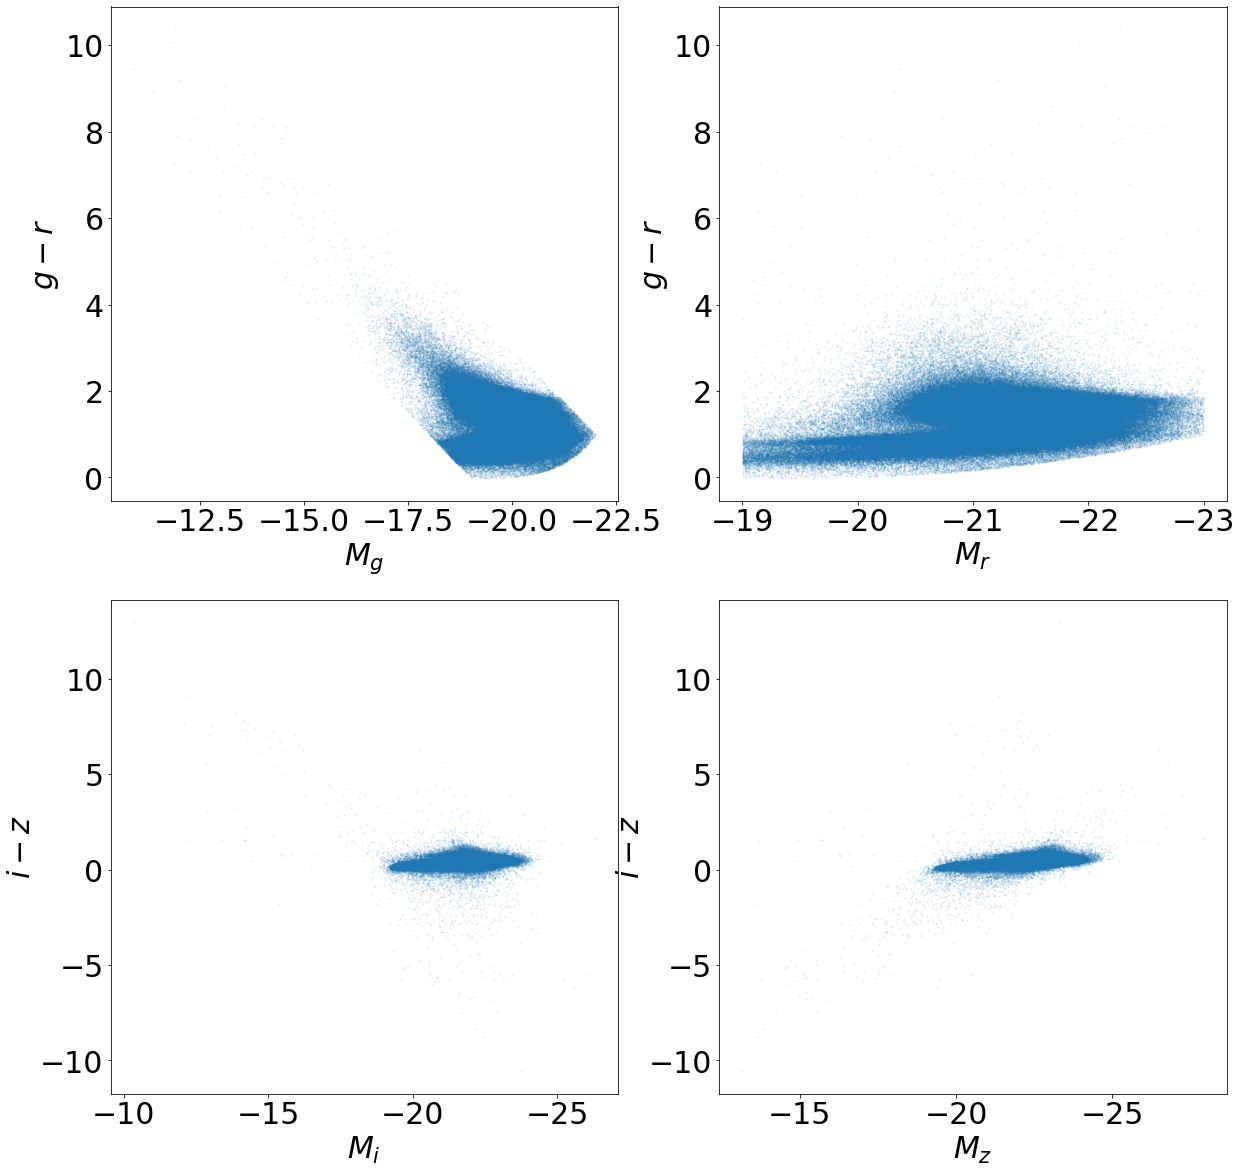

In [54]:

fig, ax = plt.subplots(figsize = (20,20), nrows = 2, ncols=2)

ax[0][0].scatter(df_new['Mg'],df_new['g']-df_new['r'],alpha=0.1,s=1)#, label = 'Cefeidas Tipo I', c = a_cep, alpha = 0.5)
ax[0][0].invert_xaxis()
ax[0][0].set_ylabel('$g-r$')
ax[0][0].set_xlabel(r'$M_g$')

ax[0][1].scatter(df_new['Mr'],df_new['g']-df_new['r'],alpha=0.1,s=1)#, label = 'RR Lyrae', c = a_rrlyr, alpha = 0.5)
ax[0][1].invert_xaxis()
ax[0][1].set_ylabel('$g-r$')
ax[0][1].set_xlabel(r'$M_r$')

ax[1][0].scatter(df_new['Mi'],df_new['i']-df_new['z'],alpha=0.1,s=1)#, label = 'RR Lyrae', c = a_rrlyr, alpha = 0.5)
ax[1][0].invert_xaxis()
ax[1][0].set_ylabel('$i-z$')
ax[1][0].set_xlabel(r'$M_i$')

ax[1][1].scatter(df_new['Mz'],df_new['i']-df_new['z'],alpha=0.1,s=1)#, label = 'RR Lyrae', c = a_rrlyr, alpha = 0.5)
ax[1][1].invert_xaxis()
ax[1][1].set_ylabel('$i-z$')
ax[1][1].set_xlabel(r'$M_z$')

#fig.tight_layout()

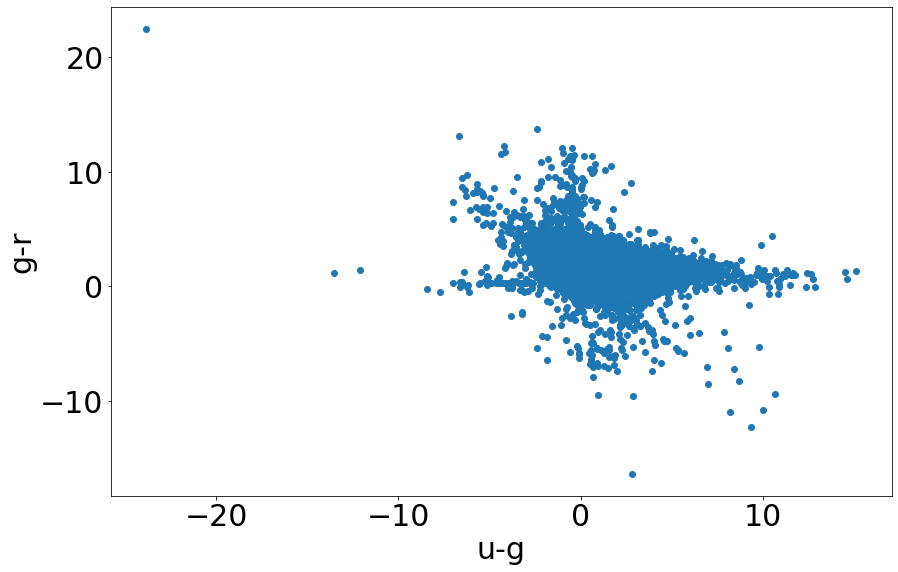

In [51]:
matplotlib.rcParams.update({'font.size': 30}) 
plt.figure(figsize=(14,9))
plt.scatter(df['u']-df['g'],df['g']-df['r'])
plt.xlabel('u-g')
plt.ylabel('g-r')
plt.show()
plt.close()